# MoMA's Acquisition Practices, Part II: Progressive or Conservative?
So MoMA's acquisition practices are trending towards older artworks by older, deader artists. However, the Dept. of Painting & Sculpture is also clearly making an effort to deepen its holdings of work by women artists, more that doubling female representation in its collection over the past few decades (even though, it must be said, the department still has a long ways to go with women representing only about 14% of its collection).

Are there other metrics for tracking the museum's progressive or conservative orientation? What about trying to assess other ways in which the collection is becoming more inclusive and diverse?

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read data
df = pd.read_csv('../data/moma/Artworks_multiartist_clean.csv')
df.head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,year_acquired,date_stripped,begun_year,completed_year,birth_year,death_year,artwork_age,living,artist_age,years_posthumous
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,...,1996.0,1896,1896.0,1896.0,1841.0,1918.0,100.0,0.0,NaN,78.0
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,...,1995.0,1987,1987.0,1987.0,1944.0,0.0,8.0,1.0,51.0,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,1997.0,1903,1903.0,1903.0,1876.0,1957.0,94.0,0.0,NaN,40.0
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1980,Photographic reproduction with colored synthet...,...,1995.0,1980,1980.0,1980.0,1944.0,0.0,15.0,1.0,51.0,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,1997.0,1903,1903.0,1903.0,1876.0,1957.0,94.0,0.0,NaN,40.0


In [3]:
# Establish Palette 1
palette1_dict = {
    'red': '#FE5F55',
    'blue': '#208AAE',
    'green': '#18A999',
    'yellow': '#F0F3BD',
    'darkblue': '#00072D',
    'purple': '#9368B7',
    'orange': '#F2B880',
    'pink': '#EFC3E6',
    'darkred': '#C44536',
    'darkgreen': '#4B644A',
    'gray': '#DDDDDD',
    'darkgray': '#AAAAAA'
}
palette1_colors = [c for c in palette1_dict.values()]
palette1 = sns.color_palette(palette1_colors)
palette1

[(0.996078431372549, 0.37254901960784315, 0.3333333333333333),
 (0.12549019607843137, 0.5411764705882353, 0.6823529411764706),
 (0.09411764705882353, 0.6627450980392157, 0.6),
 (0.9411764705882353, 0.9529411764705882, 0.7411764705882353),
 (0.0, 0.027450980392156862, 0.17647058823529413),
 (0.5764705882352941, 0.40784313725490196, 0.7176470588235294),
 (0.9490196078431372, 0.7215686274509804, 0.5019607843137255),
 (0.9372549019607843, 0.7647058823529411, 0.9019607843137255),
 (0.7686274509803922, 0.27058823529411763, 0.21176470588235294),
 (0.29411764705882354, 0.39215686274509803, 0.2901960784313726),
 (0.8666666666666667, 0.8666666666666667, 0.8666666666666667),
 (0.6666666666666666, 0.6666666666666666, 0.6666666666666666)]

In [4]:
# Establish Palette 2
palette2_dict = {
    'orange':'#F18F01',
    'blue':'#2E86AB',
    'purple':'#A23B72',
    'black':'#02020A'
}
palette2_colors = [c for c in palette2_dict.values()]
palette2 = sns.color_palette(palette2_colors)
palette2

[(0.9450980392156862, 0.5607843137254902, 0.00392156862745098),
 (0.1803921568627451, 0.5254901960784314, 0.6705882352941176),
 (0.6352941176470588, 0.23137254901960785, 0.4470588235294118),
 (0.00784313725490196, 0.00784313725490196, 0.0392156862745098)]

In [5]:
# Set Theme
sns.set_theme(
    context='notebook', 
    style='white', 
    palette=palette1,
    rc={'axes.linewidth':1}
)

In [6]:
# Filter dataset for Dept of Painting and Sculpture
df = df[df['Department'] == 'Painting & Sculpture'].copy()

print("MoMA's Dept. of Painting and Sculpture contains {:,} works".format(len(df)))

MoMA's Dept. of Painting and Sculpture contains 3,981 works


In [7]:
# Remove spaces betwen multi-word nationalities
df['nationality_stripped'] = df['Nationality'].str.replace(' ', '', regex=False)
df['nationality_stripped']

32097      (Spanish)
33171       (German)
33428       (German)
34488      (Spanish)
35406     (American)
             ...    
140586    (American)
140587    (American)
140588    (American)
140592    (American)
140593      (Malian)
Name: nationality_stripped, Length: 3981, dtype: object

In [8]:
# Prepare `Nationality` feature
df['nationality_stripped'] = (
    df['Nationality'].str.replace(' ', '', regex=False) # Remove spaces for multi-word nationalities
    .str.strip('\(\)') # Strip parentheses from ends
    .str.replace('\)\(', ' ', regex=True) # Replace inner parenthesis with space (where multiple artists)
)

df['nationality_stripped'].value_counts()

American                                   1991
French                                      432
German                                      281
British                                     167
Spanish                                     140
                                           ... 
French French                                 1
American German                               1
Senegalese                                    1
Italian Italian Italian Italian Italian       1
Malian                                        1
Name: nationality_stripped, Length: 85, dtype: int64

In [9]:
# Create tokens for each nationality found in `nationality_stripped`
from sklearn.feature_extraction.text import CountVectorizer

countvectorizer = CountVectorizer()

X = countvectorizer.fit_transform(df['nationality_stripped'])
X_columns = countvectorizer.get_feature_names_out()

nationalities = pd.DataFrame(X.toarray(), columns=X_columns, index=df.index).add_prefix('nationality_')
nationality_cols = nationalities.columns # Store this for later
nationalities.head()

,nationality_american,nationality_argentine,nationality_australian,nationality_austrian,nationality_bahamian,nationality_belgian,nationality_beninese,nationality_bolivian,nationality_bosnian,nationality_brazilian,...,nationality_sudanese,nationality_swedish,nationality_swiss,nationality_tanzanian,nationality_thai,nationality_turkish,nationality_ukrainian,nationality_uruguayan,nationality_venezuelan,nationality_zimbabwean
32097,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33428,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34488,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35406,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df = df.merge(nationalities, left_index=True, right_index=True)
df.head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,nationality_sudanese,nationality_swedish,nationality_swiss,nationality_tanzanian,nationality_thai,nationality_turkish,nationality_ukrainian,nationality_uruguayan,nationality_venezuelan,nationality_zimbabwean
32097,"Rope and People, I",Joan Miró,4016,"(Spanish, 1893–1983)",(Spanish),(1893),(1983),(Male),"Barcelona, March 27, 1935","Oil on cardboard mounted on wood, with coil of...",...,0,0,0,0,0,0,0,0,0,0
33171,Fire in the Evening,Paul Klee,3130,"(German, born Switzerland. 1879–1940)",(German),(1879),(1940),(Male),1929,Oil on cardboard,...,0,0,0,0,0,0,0,0,0,0
33428,Portrait of an Equilibrist,Paul Klee,3130,"(German, born Switzerland. 1879–1940)",(German),(1879),(1940),(Male),1927,Oil and collage on cardboard over wood with pa...,...,0,0,0,0,0,0,0,0,0,0
34488,Guitar,Pablo Picasso,4609,"(Spanish, 1881–1973)",(Spanish),(1881),(1973),(Male),"Paris, early 1919","Oil, charcoal and pinned paper on canvas",...,0,0,0,0,0,0,0,0,0,0
35406,Grandmother,Arthur Dove,1602,"(American, 1880–1946)",(American),(1880),(1946),(Male),1925,"Shingles, needlepoint, page from Concordance, ...",...,0,0,0,0,0,0,0,0,0,0


In [11]:
nationalities_ordered = df[nationality_cols].sum().sort_values(ascending=False)
topnine = nationalities_ordered[:11]
ten = nationalities_ordered[11:].sum()
topten = pd.concat([topnine, pd.Series(ten, index=['nationality_other'])])
topten

nationality_american      2015
nationality_french         434
nationality_german         285
nationality_british        173
nationality_spanish        140
nationality_italian        122
nationality_brazilian       94
nationality_japanese        78
nationality_swiss           75
nationality_belgian         59
nationality_venezuelan      53
nationality_other          481
dtype: int64

# How does MoMA's collection break down by artist nationality?

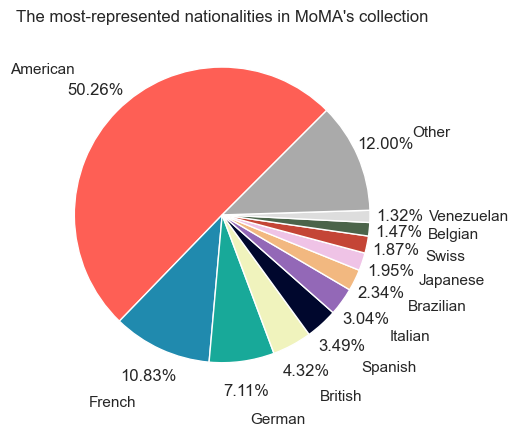

In [12]:
plt.pie(
    topten.values,
    #autopct='%.2f', 
    autopct=lambda s: '{:.2f}%'.format(s),
    #colors=[palette1_dict['red'], palette1_dict['gray']], 
    labels=topten.index.str.title().str[12:],
    #wedgeprops=dict(edgecolor='black', linewidth=.5),
    labeldistance=1.4,
    pctdistance=1.2, startangle=45, 
)

plt.title('The most-represented nationalities in MoMA\'s collection');

This is more or less what I would expect: predominantly American and European.

In [13]:
# Compute acquisitions per nationality per year
by_year = df.groupby('year_acquired')[nationality_cols].sum()

# Compute total annual acquisitions
by_year_total = by_year.sum(axis=1)

# Compute proportion of nationality to total annual acquisitions
by_year_prop = by_year.div(by_year_total, axis=0)

by_year_prop.head()

,nationality_american,nationality_argentine,nationality_australian,nationality_austrian,nationality_bahamian,nationality_belgian,nationality_beninese,nationality_bolivian,nationality_bosnian,nationality_brazilian,...,nationality_sudanese,nationality_swedish,nationality_swiss,nationality_tanzanian,nationality_thai,nationality_turkish,nationality_ukrainian,nationality_uruguayan,nationality_venezuelan,nationality_zimbabwean
year_acquired,,,,,,,,,,,,,,,,,,,,,
1930.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1931.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1932.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1934.0,0.315789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1935.0,0.368421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Compute acquitiions per nationality per year (cumulative)
by_year_cum = by_year.cumsum()

# Compute total acquisitions per year (cumulative)
by_year_cum_total = by_year_cum.sum(axis=1)

# Compute proportion of nationality acquisitions to total cumulative acquisitions
by_year_cum_prop = by_year_cum.div(by_year_cum_total, axis=0)

by_year_cum_prop

,nationality_american,nationality_argentine,nationality_australian,nationality_austrian,nationality_bahamian,nationality_belgian,nationality_beninese,nationality_bolivian,nationality_bosnian,nationality_brazilian,...,nationality_sudanese,nationality_swedish,nationality_swiss,nationality_tanzanian,nationality_thai,nationality_turkish,nationality_ukrainian,nationality_uruguayan,nationality_venezuelan,nationality_zimbabwean
year_acquired,,,,,,,,,,,,,,,,,,,,,
1930.0,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1931.0,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1932.0,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1934.0,0.307692,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1935.0,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.022222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018.0,0.506214,0.010875,0.002071,0.008286,0.000518,0.014500,0.000000,0.000259,0.000518,0.019679,...,0.000259,0.001813,0.019161,0.000259,0.000259,0.002589,0.000777,0.004402,0.013465,0.000777
2019.0,0.504361,0.011288,0.002052,0.008209,0.000513,0.014366,0.000770,0.000257,0.000513,0.019754,...,0.000257,0.001796,0.018984,0.000257,0.000257,0.002565,0.000770,0.004361,0.013597,0.000770
2020.0,0.504343,0.011242,0.002044,0.008176,0.000511,0.014308,0.000766,0.000255,0.000511,0.021206,...,0.000255,0.001788,0.018906,0.000255,0.000255,0.002555,0.000766,0.004343,0.013541,0.000766


# How has the composition of its collection changed over time?
Using artist nationality as a metric, has it MoMA become more globally-oriented over time?

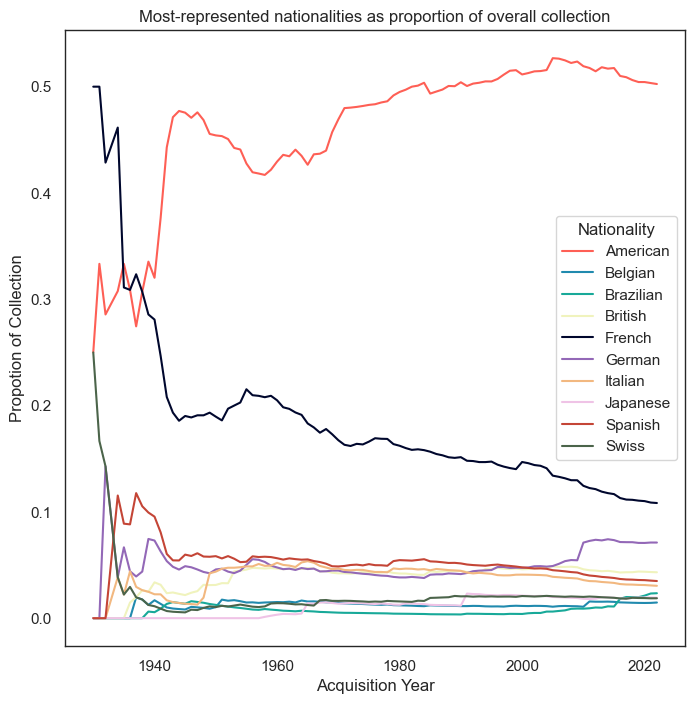

In [15]:
melted = by_year_cum_prop.melt(ignore_index=False, var_name='nationality', value_name='proportion')
melted['nationality'] = melted['nationality'].str.title().str[12:]
topten = melted[melted['nationality'].isin(nationalities_ordered[:10].index.str.title().str[12:])].reset_index()

fig, ax = plt.subplots(figsize=(8, 8))

sns.lineplot(
    data=topten,
    x='year_acquired',
    y='proportion',
    hue='nationality',
    ax=ax    
)

ax.set_title('Most-represented nationalities as proportion of overall collection')
ax.set_xlabel('Acquisition Year')
ax.set_ylabel('Propotion of Collection')
ax.legend(title='Nationality');

This is quite interesting to me--not what I expected at first, but in retrospect makes sense.

The first obvious thing to notice is that American artists make up an ever-growing proportion of the collection, from about 30% around the time of the museum's founding to a high of around 50% somewhere around 2010. In more recent years, that number is starting to fall.

Meanwhile, European artists--French in particular but also Swiss, German, and Spanish--who were relatively well-represented in the collection early on have become an ever-smaller proportion of the collection over time.

Why does this make sense? Well, at the museum's founding, the major developments in modernism had been (and were still) occurring in France. We'd have to dig in more to see what works in particular the department was acquiring, but if it was collecting Impressionism, Post-Impressionism, Cubism, Fauvism, Dada, Surrealism, etc., that's French stuff right there. Mostly. I think we can safely assume that the Spanish influence is exclusively Picasso, perhaps Dalí and Miró as well. Swiss would have to be Giacometti.

But, in a dramatic change, American art suddenly begins to account for a huge portion of the overall collection starting in the early- and mid-1940s and at precisely the same moment that European representation drops off.

Why? Well, this is the moment that America assumes the mantle, so to speak, and becomes a major epicenter for advanced cultural practice. During the rise of Fascism in Europe during the 1930s and with the outbreak of war, artists were fleeing Europe, often to the U.S. And thanks in part to the influence of European emigres, the 1940s saw the birth of what would become Abstract Expressionism, a form that would be hegemonic in global art discourse for really the next 20 years.

What's really cool about this chart is that we can see that shift happen in real time as the museum responds rapidly to equally rapid developments in the cultural sector.

The flipside, of course, is that the museum appears not to have continued this response. For the past few decades at least, art discourse is more global that is has ever been before, but arguably American artists remain disproportionately represented in MoMA's collection.


But before committing too quickly to this narrative, let's see if we can complicate it a bit:

In [16]:
# Count number of nationalities represented in collection each year
unique_nationalities_per_year = (
    melted[melted['proportion'] > 0]
    .groupby('year_acquired')[['nationality']]
    .count()
    .reset_index()
)

unique_nationalities_per_year

,year_acquired,nationality
0,1930.0,3
1,1931.0,3
2,1932.0,4
3,1934.0,6
4,1935.0,8
...,...,...
87,2018.0,64
88,2019.0,66
89,2020.0,66
90,2021.0,68


# MoMA's collection is more geographically inclusive than ever before

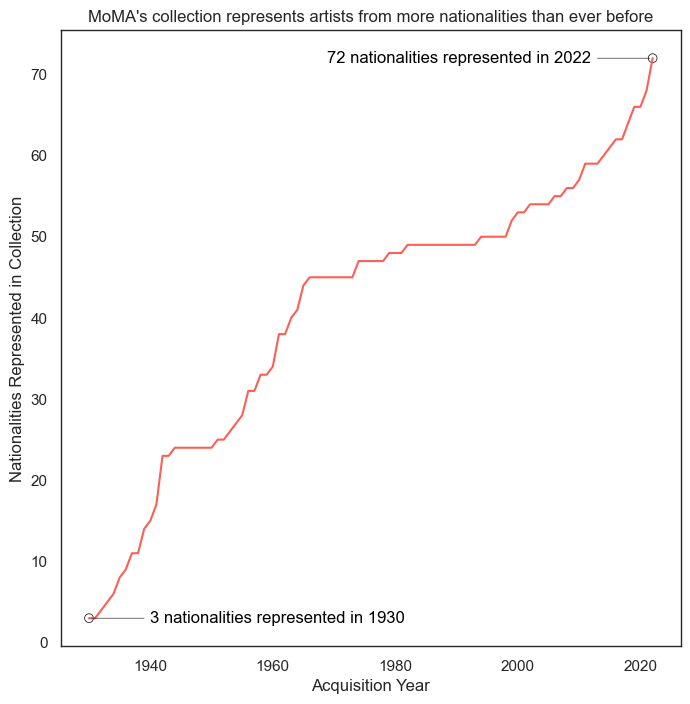

In [17]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.lineplot(
    data=unique_nationalities_per_year,
    x='year_acquired',
    y='nationality'
)

sns.scatterplot(
    data=unique_nationalities_per_year.iloc[[0, -1]],
    x='year_acquired',
    y='nationality',
    edgecolor='black',
    facecolor='none',
    s=40
)

start_year, start_count = unique_nationalities_per_year.iloc[0]
end_year, end_count = unique_nationalities_per_year.iloc[-1]

ax.annotate(
    '{:,.0f} nationalities represented in {:.0f}'.format(start_count, start_year), 
    xy=(start_year, start_count),
    xycoords='data', xytext=(start_year + 10, start_count), 
    textcoords='data', arrowprops=dict(arrowstyle='-', color='black', lw=.4),
    horizontalalignment='left', verticalalignment='center', color='black'
)

ax.annotate(
    '{:,.0f} nationalities represented in {:.0f}'.format(end_count, end_year), 
    xy=(end_year, end_count),
    xycoords='data', xytext=(end_year - 10, end_count), 
    textcoords='data', arrowprops=dict(arrowstyle='-', color='black', lw=.4),
    horizontalalignment='right', verticalalignment='center', color='black'
)


ax.set_title('MoMA\'s collection represents artists from more nationalities than ever before')
ax.set_xlabel('Acquisition Year')
ax.set_ylabel('Nationalities Represented in Collection');

This chart certainly paints a rosier picture, but a picture that is misleading, since we already know that one nationality (i.e., Americans) comprise half of the collection today.

In [18]:
nationality_to_continent = {
   'American':'North America (U.S.)', 
    'Argentine':'South America', 
    'Australian':'Australia', 
    'Austrian':'Europe', 
    'Bahamian':'North America (Non-U.S.)',
    'Belgian':'Europe', 
    'Beninese':'Africa', 
    'Bolivian':'South America', 
    'Bosnian':'Europe', 
    'Brazilian':'South America',
    'British':'Europe', 
    'Canadian':'North America (Non-U.S.)', 
    'Chilean':'South America', 
    'Chinese':'Asia', 
    'Colombian':'South America',
    'Congolese':'Africa', 
    'Croatian':'Europe', 
    'Cuban':'North America (Non-U.S.)', 
    'Czech':'Europe', 
    'Danish':'Europe', 
    'Dutch':'Europe',
    'Egyptian':'Africa', 
    'French':'Europe', 
    'Georgian':'Europe', 
    'German':'Europe', 
    'Ghanaian':'Africa', 
    'Greek':'Europe',
    'Guatemalan':'North America (Non-U.S.)', 
    'Haitian':'North America (Non-U.S.)', 
    'Hungarian':'Europe', 
    'Icelandic':'Europe', 
    'Indian':'Asia',
    'Iranian':'Asia', 
    'Iraqi':'Asia', 
    'Irish':'Europe', 
    'Israeli':'Asia', 
    'Italian':'Europe', 
    'Japanese':'Asia',
    'Kenyan':'Africa', 
    'Korean':'Asia', 
    'Latvian':'Europe', 
    'Lebanese':'Asia', 
    'Malian':'Africa', 
    'Mexican':'North America (Non-U.S.)',
    'Moroccan':'Africa', 
    'Mozambican':'Africa', 
    'Nativeamerican':'North America (Non-U.S.)', 
    'Newzealander':'Australia',
    'Nicaraguan':'North America (Non-U.S.)', 
    'Nigerian':'Africa', 
    'Norwegian':'Europe', 
    'Pakistani':'Asia',
    'Peruvian':'South America',
     'Polish':'Europe', 
    'Romanian':'Europe', 
    'Russian':'Asia', 
    'Salvadoran':'North America (Non-U.S.)', 
    'Scottish':'Europe',
    'Senegalese':'Africa', 
    'Slovenian':'Europe', 
    'Southafrican':'Africa', 
    'Spanish':'Europe', 
    'Sudanese':'Africa',
    'Swedish':'Europe', 
    'Swiss':'Europe', 
    'Tanzanian':'Africa', 
    'Thai':'Asia', 
    'Turkish':'Asia', 
    'Ukrainian':'Europe',
    'Uruguayan':'South America', 
    'Venezuelan':'South America', 
    'Zimbabwean':'Africa'
}

In [19]:
# Count acquisitions per year by nationality
by_continent = df.groupby('year_acquired')[nationality_cols].sum().stack().reset_index()

# Rename columns of resulting DF
by_continent.rename(columns={'level_1':'nationality', 0:'acquisitions_count'}, inplace=True)

# Map continent values to nationalities
by_continent['continent'] = by_continent['nationality'].str.title().str[12:].map(nationality_to_continent)

# Count acquisitions per year by continent
by_continent = by_continent.pivot_table(
    index='year_acquired', values='acquisitions_count', columns='continent', aggfunc='sum'
)

# Compute cumsum per continuent
by_continent_cumulative = by_continent.cumsum()

# Compute cumulative totals per year
total_cumulative = by_continent_cumulative.sum(axis=1)

# Compute cumulative proportion per continent
by_continent_cumulative_prop = by_continent_cumulative.div(total_cumulative, axis=0)

by_continent_cumulative_prop

continent,Africa,Asia,Australia,Europe,North America (Non-U.S.),North America (U.S.),South America
year_acquired,,,,,,,
1930.0,0.000000,0.000000,0.000000,0.750000,0.000000,0.250000,0.000000
1931.0,0.000000,0.000000,0.000000,0.666667,0.000000,0.333333,0.000000
1932.0,0.000000,0.000000,0.000000,0.714286,0.000000,0.285714,0.000000
1934.0,0.000000,0.000000,0.000000,0.692308,0.000000,0.307692,0.000000
1935.0,0.000000,0.133333,0.000000,0.511111,0.022222,0.333333,0.000000
...,...,...,...,...,...,...,...
2018.0,0.004661,0.040911,0.003107,0.368980,0.019938,0.506214,0.056189
2019.0,0.007183,0.041303,0.003079,0.367111,0.020267,0.504361,0.056696
2020.0,0.007154,0.041390,0.003066,0.365866,0.020184,0.504343,0.057997


In [20]:
melted = by_continent_cumulative_prop.melt(ignore_index=False, value_name='proportion').reset_index()
melted

,year_acquired,continent,proportion
0,1930.0,Africa,0.000000
1,1931.0,Africa,0.000000
2,1932.0,Africa,0.000000
3,1934.0,Africa,0.000000
4,1935.0,Africa,0.000000
...,...,...,...
639,2018.0,South America,0.056189
640,2019.0,South America,0.056696
641,2020.0,South America,0.057997
642,2021.0,South America,0.059551


In [21]:
[(a, b) for a, b in by_continent_cumulative_prop.loc[2022].items()]

[('Africa', 0.009236145781328009),
 ('Asia', 0.04193709435846231),
 ('Australia', 0.0029955067398901645),
 ('Europe', 0.3619570644033949),
 ('North America (Non-U.S.)', 0.021467798302546182),
 ('North America (U.S.)', 0.5024962556165752),
 ('South America', 0.05991013479780329)]

# But it remains disproportionately weighted toward American and European artists
To get a more macroscopic view, I reduced the cardinality of the nationalities feature so that we're considering continents rather than countries. Because American artists represent such a huge segment of the collection, though, I'm separating North America into U.S. and Non-U.S. artists. The result, though, is that the collection remains disproportionately weighted toward American and European artists. 

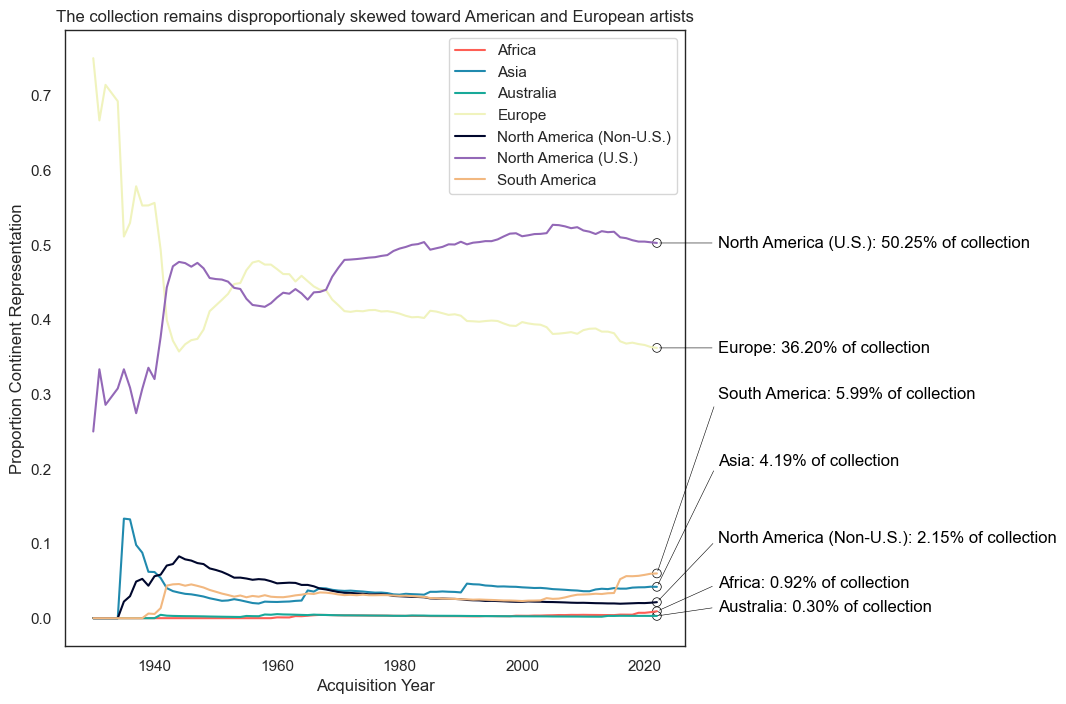

In [22]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.lineplot(
    data=melted,
    x='year_acquired',
    y='proportion',
    hue='continent'
)

sns.scatterplot(
    y=by_continent_cumulative_prop.loc[2022].values,
    x=[2022] * 7,
    edgecolor='black',
    facecolor='none',
    s=40
)

for contintent, proportion in by_continent_cumulative_prop.loc[2022].items():
    
    ax.annotate(
        '{}: {:.2f}% of collection'.format(contintent, proportion * 100), 
        xy=(2022, proportion),
        xycoords='data', xytext=(2032, proportion * 5 if proportion < .2 else proportion), 
        textcoords='data', arrowprops=dict(arrowstyle='-', color='black', lw=.4, relpos=(0, .5)),
        horizontalalignment='left', verticalalignment='center', color='black', 
    )


ax.set_title('The collection remains disproportionaly skewed toward American and European artists')
ax.set_xlabel('Acquisition Year')
ax.set_ylabel('Proportion Continent Representation');

# But in the past 20 years, the collection is trending global
The above chart more or less confirms what we already knew. But it also shows us that more recently, since 2000 or so, there are noticeable upticks in representation for Asian and South American artists. Let's extrapolate these trends using a simple regression model.

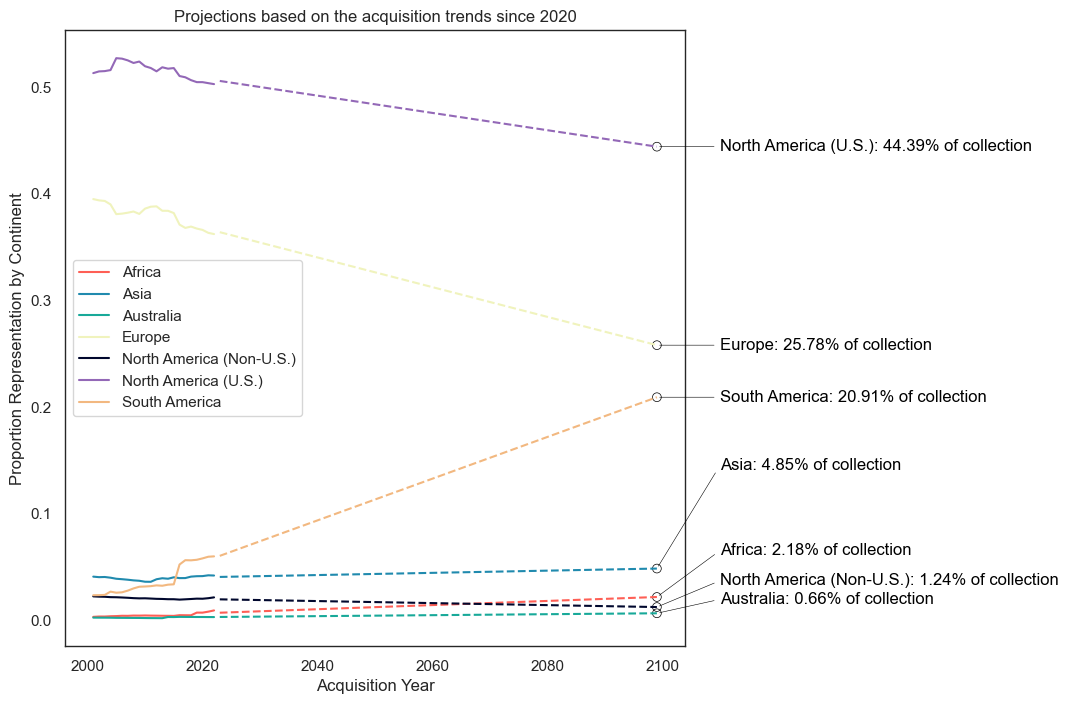

In [23]:
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots(figsize=(8, 8))

# Filter dataframe for datapoints after 2000
after2000 = melted[melted['year_acquired'] > 2000].reset_index()

sns.lineplot(
    data=after2000,
    x='year_acquired',
    y='proportion',
    hue='continent',
    ax=ax
)

# Get list of continents
continents = after2000['continent'].unique()

# Loop through `continents`, create regression model for each, and plot
for continent, color in zip(continents, palette1_colors[:7]):
    
    # Mask for current continent
    is_cur_continent = after2000['continent'] == continent 
    
    # Get feature and target variable
    X = after2000.loc[is_cur_continent, ['year_acquired']]
    y = after2000.loc[is_cur_continent, 'proportion']
    
    # Fit model and predict
    model = LinearRegression()
    x_predict = np.arange(2023, 2100)
    X_predict = pd.DataFrame(x_predict, columns=['year_acquired'])
    model.fit(X, y)
    y_predict = model.predict(X_predict)

    # Plot regression line
    sns.lineplot(
        x=X_predict['year_acquired'],
        y=y_predict,
        color=color,
        ls='--',
        lw=1.5,
        ax=ax
    )
    
    # Plot endpoints
    sns.scatterplot(
        x=X_predict['year_acquired'].iloc[[-1]],
        y=y_predict[-1],
        facecolor='none',
        edgecolor='black',
        s=40
    )
    
    # Add annotation
    ax.annotate(
        '{}: {:.2f}% of collection'.format(continent, y_predict[-1] * 100), 
        xy=(2099, y_predict[-1]),
        xycoords='data', xytext=(2110, y_predict[-1] * 3 if y_predict[-1] < .1 else y_predict[-1]), 
        textcoords='data', arrowprops=dict(arrowstyle='-', color='black', lw=.4, relpos=(0, .5)),
        horizontalalignment='left', verticalalignment='center', color='black', 
    )


ax.set_title('Projections based on the acquisition trends since 2020')
ax.set_xlabel('Acquisition Year')
ax.set_ylabel('Proportion Representation by Continent');

If acquisition trends since 2000 continue, we would reasonably expect American and European artists to comprise a smaller proportion of the collection in the future. Likewise, we should expect more representation from other continents--the acquisition of artists from South America has the steepest regression slope by far.